## Introduction

This can be an attempt to look at the Barents Sea M term with the insights of the other notebook (I'm scared).

In [1]:
# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the current kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/load_packages.py"

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [ ]:
from matplotlib.ticker import MultipleLocator

## What did we learn from the previous notebook?

- be very careful with indexing
- this will be the heat and salt transport timeseries that we did
- try to do this without any normalization by the T and S bin edges because this might be wrong
- start by making sure we use the entire basin and the gates are actually defined correctly based on this

In [2]:
# gates and series
def line_orientation(x, y):
    orientations = np.array([])

    # Iterate through the list of points
    for i in range(1, len(x)):
        if x[i] == x[i - 1] and y[i] != y[i - 1]:
            orientations = np.append(orientations,"V") # vertical line add zonal transp
        elif y[i] == y[i - 1] and x[i] != x[i - 1]:
            orientations = np.append(orientations,"H") # horizontal line add meridional transp
        else:
            orientations = np.append(orientations,"V")  # fill na should be for top of vertical line (ie U)

    # the last one will be the same as the second to last orientation so we can keep consistent sizing
    orientations = np.append(orientations,orientations[-1])

    return orientations
choose_UV_bso = line_orientation(y_bso,x_bso)
choose_UV_sfj = line_orientation(y_sfj,x_sfj)
choose_UV_fjnz = line_orientation(y_fjnz,x_fjnz)
choose_UV_nzru = line_orientation(y_nzru,x_nzru)

choose_UV_bso3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_bso,x_bso):
    choose_UV_bso3d[:,i,j] = np.full(nz,choose_UV_bso[idx])
    idx += 1

choose_UV_sfj3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_sfj,x_sfj):
    choose_UV_sfj3d[:,i,j] = np.full(nz,choose_UV_sfj[idx])
    idx += 1

choose_UV_fjnz3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_fjnz,x_fjnz):
    choose_UV_fjnz3d[:,i,j] = np.full(nz,choose_UV_fjnz[idx])
    idx += 1

choose_UV_nzru3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_nzru,x_nzru):
    choose_UV_nzru3d[:,i,j] = np.full(nz,choose_UV_nzru[idx])
    idx += 1

## Redefine mymsk based on the gates (this was wrong)

In [3]:
mymsk[:,84:110] = np.nan

(400.0, 600.0)

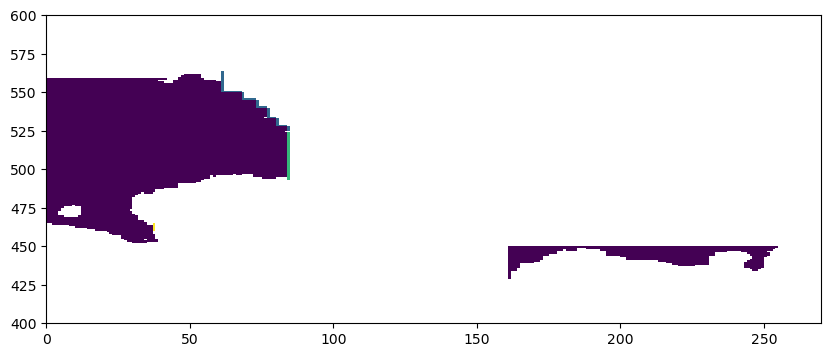

In [4]:
plt.pcolormesh(mymsk)
plt.pcolormesh(gates)
plt.ylim(400,600)

(400.0, 600.0)

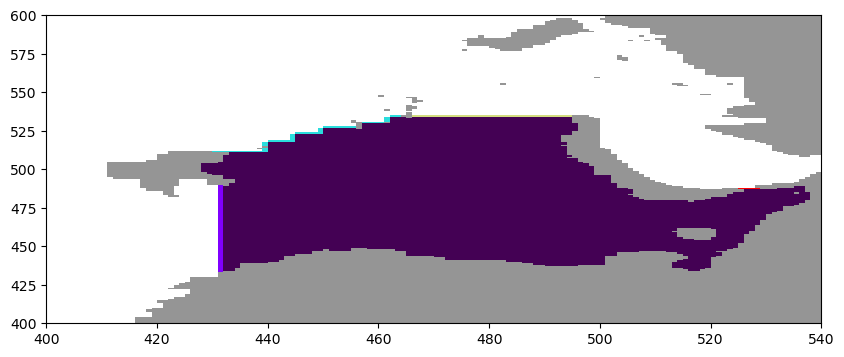

In [5]:
plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
plt.pcolormesh(get_aste_tracer(gates,nfx,nfy)[0],cmap="rainbow")
plt.pcolormesh(get_aste_tracer(landmsk,nfx,nfy)[0],cmap="Greys",vmin=-2,vmax=6)
plt.xlim(400,540)
plt.ylim(400,600)

In [26]:
choose_UV_sfj.shape

(57,)

In [59]:
# choose_UV_sfj  # the end of this array is at spitsbergen and the first V in each should be B
result = choose_UV_sfj.copy()

print(choose_UV_sfj)

for i in [3,11,20,28,37]:
    result[i] = "B"

print()
print(result)

a = get_aste_faces(mymsk,nfx,nfy)
b = get_aste_faces(gates,nfx,nfy)

# set the corner pieces equal to some other number so we can check
b3 = b.f3[0]
for i,j,k in zip(np.where(b3==2)[0],np.where(b3==2)[1],result):
    if k == "B":
        b3[i,j] += 5

['H' 'H' 'V' 'V' 'V' 'V' 'V' 'H' 'H' 'H' 'V' 'V' 'V' 'V' 'H' 'H' 'H' 'H'
 'H' 'V' 'V' 'V' 'V' 'V' 'H' 'H' 'H' 'V' 'V' 'V' 'V' 'V' 'V' 'H' 'H' 'H'
 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'V' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H']

['H' 'H' 'V' 'B' 'V' 'V' 'V' 'H' 'H' 'H' 'V' 'B' 'V' 'V' 'H' 'H' 'H' 'H'
 'H' 'V' 'B' 'V' 'V' 'V' 'H' 'H' 'H' 'V' 'B' 'V' 'V' 'V' 'V' 'H' 'H' 'H'
 'V' 'B' 'V' 'V' 'V' 'V' 'V' 'V' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H']


In [60]:
# # DEBUGGING
# b = get_aste_faces(gates,nfx,nfy)
# b3 = b.f3[0]
# index = 0
# tmp = 2
# for i,j,k in zip(np.where(b3==2)[0],np.where(b3==2)[1],result):
#     b3[i,j] += tmp
    
#     # try to set these here so we at least understand what indices to use
#     if index in [3,11,20,28,37]:
#         b3[i,j] = -10
    
#     tmp += 1
#     index += 1

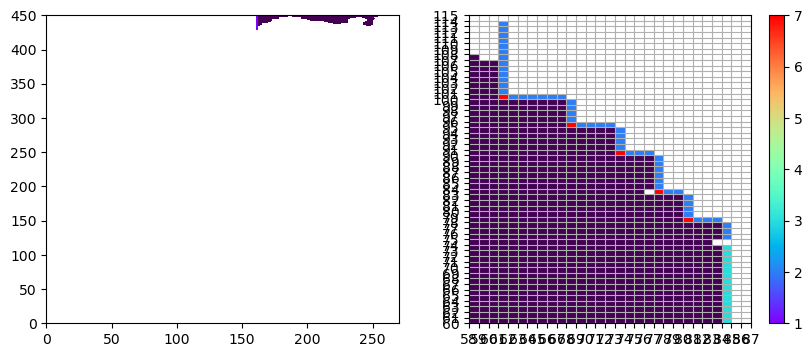

In [61]:
fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(a.f1[0])
ax.pcolormesh(b.f1[0],cmap='rainbow')
ax = plt.subplot(122)
ax.pcolormesh(a.f3[0])
cb = ax.pcolormesh(b3, cmap='rainbow')
plt.colorbar(cb)
ax.set_xlim(58, 87)
ax.set_ylim(60, 115)


# Set tick spacing every 1 unit
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

# Enable grid
ax.grid(True)

## Load the orientation of the gates as we have done before (3d)

In [15]:
# double check the BSO again to make sure this is the correct way
# we cannot just use chooseUV for sfj because we need both ADVx and ADVy -- can I just do this manually?
# np.where(gates==2)

In [47]:
# choose_UV_bso # H indicates horizontal face (ie face 1) so we use ADVx (based on the lettering) and i (it is a western face)
# H means use the X term
# V means use the Y term

In [49]:
np.where(gates==1) ## BSO
np.where(gates==2) ## SFJ
np.where(gates==3) ## FJNZ
np.where(gates==4) ## NZRU

(array([460, 461, 462, 463, 464]), array([37, 37, 37, 37, 37]))

## Double check that the indices of the gates are in fact where we want to read from the M term

We do not want to double count the advection from next to the gate within these boxes.

In [21]:
gate_labels = ["BSO", "SFJ", "FJNZ","NZRU"]

In [ ]:
## BSO is the only one split between face 1 and face 3 on the "west" and on the "north"
    # Face 1 H: i   and +ADVx
    # Face 3 V: j+1 and -ADVy

## For SFJ - these faces are on the "east" and "north" which we have labeled as H and V
    # H: i+1 and -ADVx
    # V: j+1 and -ADVy

## for FJNZ - these are on the "east"
    # H: i+1 and -ADVy

## We should be able to load the regular J terms as we did before, but let's not normalize by T and S